## N days stock price prediction    
- 3 stock to predict: Apple Inc.(AAPL), JP Morgan Chase & Co.(JPM), Pfizer Inc.(PFE)
- Predictive Model: Linear Regression, K-NN Regressor, SVM RBF Regressor, Random Forest Regressor 

In [15]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
def stock_hist(df,ticker,pred_days):
    stock = df[df['Ticker']== ticker]
    stock = stock.reset_index()
    stock = stock.drop(columns = "index")
    stock_pred = pd.DataFrame(stock, columns = ['Ticker','Date','Close','Prediction'])
    stock_pred['Prediction'] = stock_pred['Close'].shift(-pred_days)
    return stock_pred

In [4]:
def split_data(stock_pred,pred_days):
    X = np.array(stock_pred['Close'][:-pred_days])
    y = np.array(stock_pred['Prediction'][:-pred_days])
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    x_pred = np.array(stock_pred['Close'][-pred_days:])
    return x_train, x_test, y_train, y_test, x_pred

In [5]:
def prediction(x_train, x_test, y_train, y_test, x_pred, pred_days):
    # predictiion
    lr = LinearRegression()
    lr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
    y_lr_pred = lr.predict(x_pred.reshape(-1, 1))

    knn_regressor=KNeighborsRegressor(n_neighbors = 5)
    knn_model=knn_regressor.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))
    y_knn_pred=knn_model.predict(x_pred.reshape(-1, 1))

    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
    svr_rbf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
    y_svm_pred = svr_rbf.predict(x_pred.reshape(-1, 1))

    rf = RandomForestRegressor()
    rf_model = rf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
    y_rf_pred=rf_model.predict(x_pred.reshape(-1, 1))

    predict_table = pd.DataFrame(columns=['Date','Close','y_svm_pred','y_lr_pred','y_knn_pred','y_rf_pred'])
    predict_table['Date'] = apple_pred['Date'][-pred_days:]
    predict_table['Close'] = apple_pred['Close'][-pred_days:]
    predict_table['y_lr_pred'] = y_lr_pred
    predict_table['y_knn_pred'] = y_knn_pred
    predict_table['y_svm_pred'] = y_svm_pred
    predict_table['y_rf_pred'] = y_rf_pred

    # accuracy
    lr_accuracy = lr.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
    knn_accuracy = knn_model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
    svm_accuracy = svr_rbf.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
    rf_accuracy = rf_model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))

    accuracy = [lr_accuracy,knn_accuracy,svm_accuracy,rf_accuracy]
    cols = ['Accuracy']
    inds = ['LinReg','K-NN','SVM_RBF','RanForest']
    accuracy_table = pd.DataFrame(columns = cols, index = inds)
    accuracy_table['Accuracy'] = accuracy

    return predict_table,accuracy_table

#### load s&p 500 data

In [6]:
df = pd.read_csv("sp500_all_5y.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

## A. Predict 30 days

In [7]:
pred_days = 30

### 1. Apple Inc. stock (Ticker: AAPL)

In [8]:
apple_pred = stock_hist(df,"AAPL",pred_days)
x_train1, x_test1, y_train1, y_test1, x_pred1 = split_data(apple_pred,pred_days)

In [9]:
predict_table1,accuracy_table1 = prediction(x_train1, x_test1, y_train1, y_test1, x_pred1, pred_days)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


### 2. JP Morgan Chase & Co. (Ticker: JPM)

In [10]:
jpm_pred = stock_hist(df,"JPM",pred_days)
x_train2, x_test2, y_train2, y_test2, x_pred2 = split_data(jpm_pred,pred_days)

In [11]:
predict_table2,accuracy_table2 = prediction(x_train2, x_test2, y_train2, y_test2, x_pred2, pred_days)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


### 3. Pfizer Inc. stock (Ticker: PFE)

In [12]:
pfe_pred = stock_hist(df,"PFE",pred_days)
x_train3, x_test3, y_train3, y_test3, x_pred3 = split_data(pfe_pred,pred_days)

In [13]:
predict_table3,accuracy_table3 = prediction(x_train3, x_test3, y_train3, y_test3, x_pred3, pred_days)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


#### Visualization

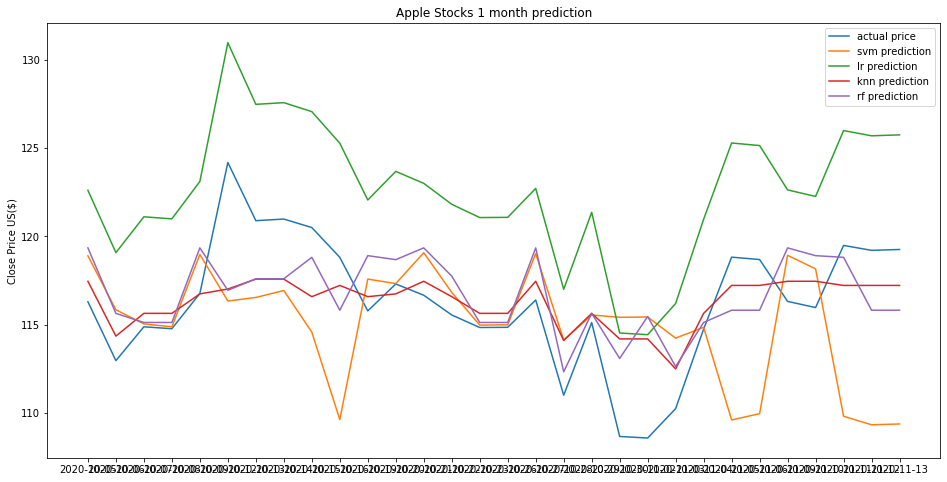

In [16]:
plt.figure(figsize=(16,8))
plt.title('Apple Stocks 1 month prediction')
plt.plot(predict_table1['Date'], predict_table1['Close'],label = 'actual price')
plt.plot(predict_table1['Date'], predict_table1['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table1['Date'], predict_table1['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table1['Date'], predict_table1['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table1['Date'], predict_table1['y_rf_pred'],label = 'rf prediction')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

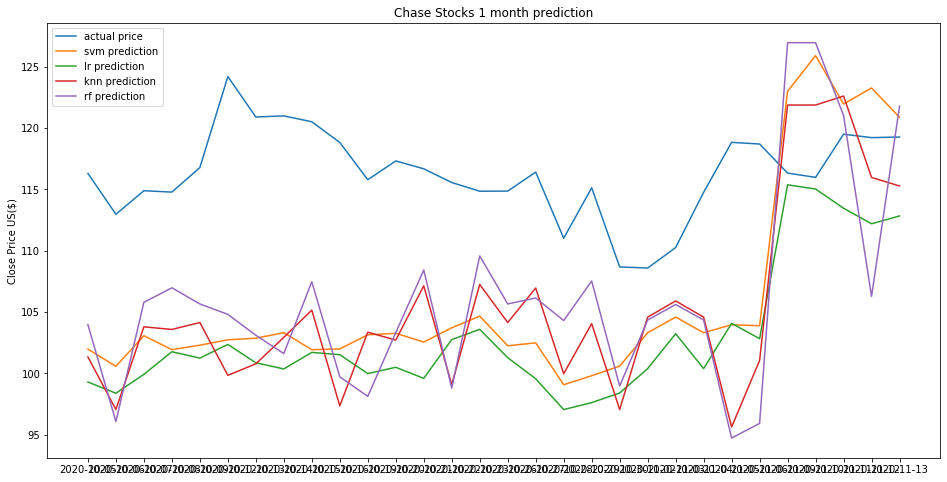

In [17]:
plt.figure(figsize=(16,8))
plt.title('Chase Stocks 1 month prediction')
plt.plot(predict_table2['Date'], predict_table2['Close'],label = 'actual price')
plt.plot(predict_table2['Date'], predict_table2['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table2['Date'], predict_table2['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table2['Date'], predict_table2['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table2['Date'], predict_table2['y_rf_pred'],label = 'rf prediction')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

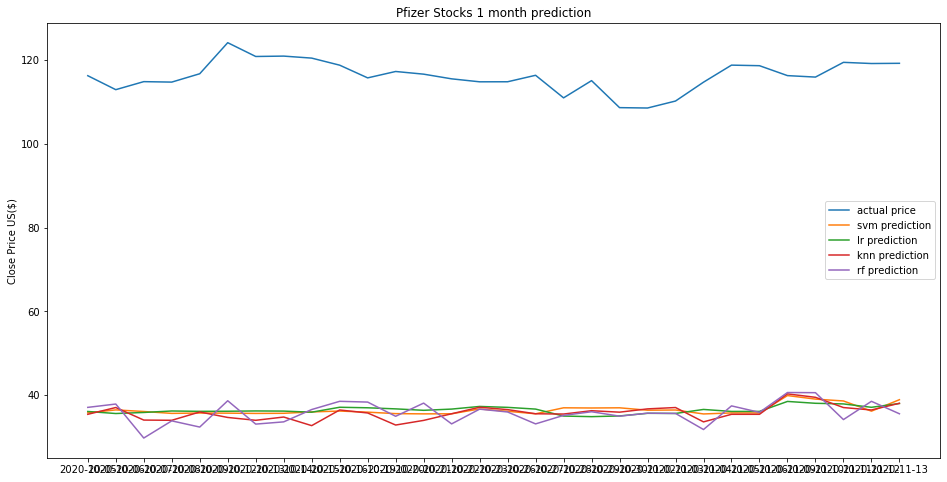

In [18]:
plt.figure(figsize=(16,8))
plt.title('Pfizer Stocks 1 month prediction')
plt.plot(predict_table3['Date'], predict_table3['Close'],label = 'actual price')
plt.plot(predict_table3['Date'], predict_table3['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table3['Date'], predict_table3['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table3['Date'], predict_table3['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table3['Date'], predict_table3['y_rf_pred'],label = 'rf prediction')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

In [19]:
accuracy = pd.DataFrame(columns = ['Apple','Chase','Pfizer'],index = ['LinReg','K-NN','SVM_RBF','RanForest'])
accuracy['Apple'] = accuracy_table1['Accuracy']
accuracy['Chase'] = accuracy_table2['Accuracy']
accuracy['Pfizer'] = accuracy_table3['Accuracy']
accuracy

,Apple,Chase,Pfizer
LinReg,0.924250,0.810104,0.773363
K-NN,0.942005,0.860611,0.764231
SVM_RBF,0.931616,0.824234,0.810870
RanForest,0.916523,0.843021,0.666365


## B. Predict 60 days

In [20]:
pred_days2 = 60

### 1. Apple Inc. stock (Ticker: AAPL)

In [21]:
apple_pred2 = stock_hist(df,"AAPL",pred_days2)
x_train4, x_test4, y_train4, y_test4, x_pred4 = split_data(apple_pred2,pred_days2)

In [22]:
predict_table4,accuracy_table4 = prediction(x_train4, x_test4, y_train4, y_test4, x_pred4, pred_days2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


### 2. JP Morgan Chase & Co. (Ticker: JPM)

In [23]:
jpm_pred2 = stock_hist(df,"JPM",pred_days2)
x_train5, x_test5, y_train5, y_test5, x_pred5 = split_data(jpm_pred2,pred_days2)

In [24]:
predict_table5,accuracy_table5 = prediction(x_train5, x_test5, y_train5, y_test5, x_pred5, pred_days2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


### 3. Pfizer Inc. stock (Ticker: PFE)

In [25]:
pfe_pred2 = stock_hist(df,"PFE",pred_days2)
x_train6, x_test6, y_train6, y_test6, x_pred6 = split_data(pfe_pred2,pred_days2)

In [28]:
predict_table6,accuracy_table6 = prediction(x_train6, x_test6, y_train6, y_test6, x_pred6, pred_days2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


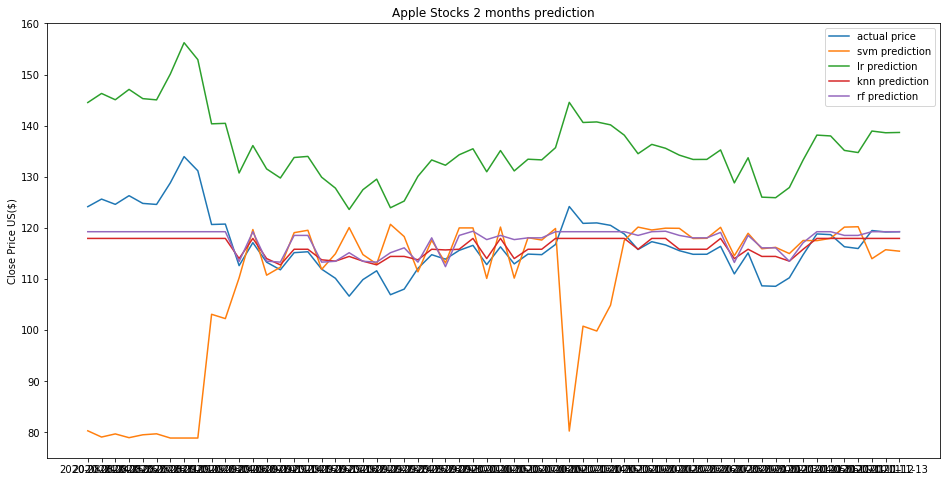

In [29]:
plt.figure(figsize=(16,8))
plt.title('Apple Stocks 2 months prediction')
plt.plot(predict_table4['Date'], predict_table4['Close'],label = 'actual price')
plt.plot(predict_table4['Date'], predict_table4['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table4['Date'], predict_table4['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table4['Date'], predict_table4['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table4['Date'], predict_table4['y_rf_pred'],label = 'rf prediction')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

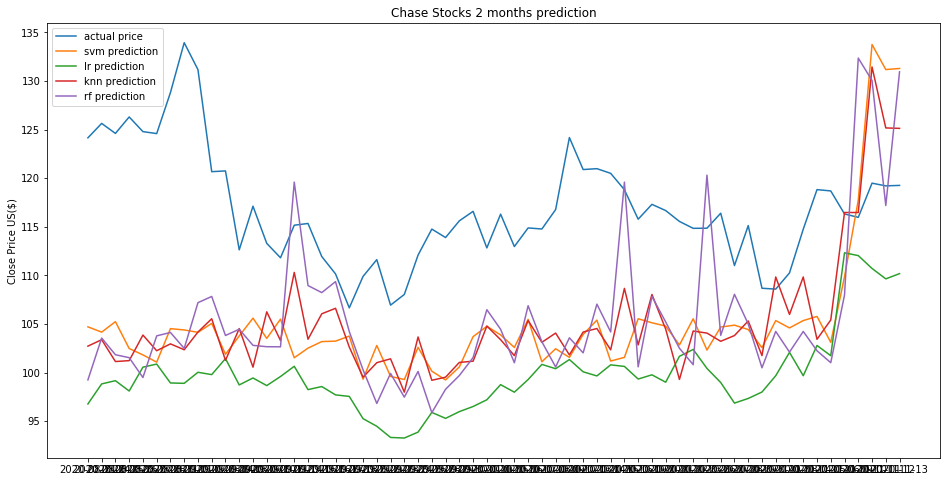

In [30]:
plt.figure(figsize=(16,8))
plt.title('Chase Stocks 2 months prediction')
plt.plot(predict_table5['Date'], predict_table5['Close'],label = 'actual price')
plt.plot(predict_table5['Date'], predict_table5['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table5['Date'], predict_table5['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table5['Date'], predict_table5['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table5['Date'], predict_table5['y_rf_pred'],label = 'rf prediction')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

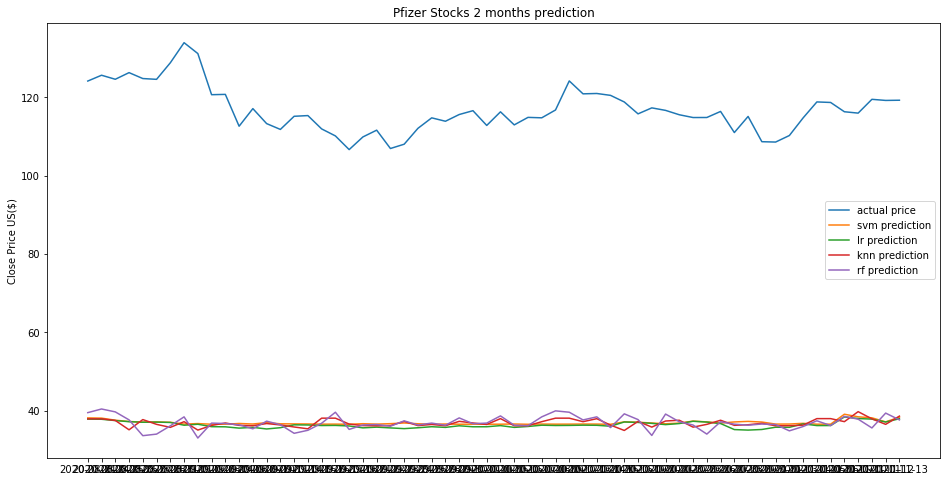

In [31]:
plt.figure(figsize=(16,8))
plt.title('Pfizer Stocks 2 months prediction')
plt.plot(predict_table6['Date'], predict_table6['Close'],label = 'actual price')
plt.plot(predict_table6['Date'], predict_table6['y_svm_pred'],label = 'svm prediction')
plt.plot(predict_table6['Date'], predict_table6['y_lr_pred'],label = 'lr prediction')
plt.plot(predict_table6['Date'], predict_table6['y_knn_pred'],label = 'knn prediction')
plt.plot(predict_table6['Date'], predict_table6['y_rf_pred'],label = 'rf prediction')
plt.ylabel('Close Price US($)')
plt.legend()
plt.show()

In [32]:
accuracy2 = pd.DataFrame(columns = ['Apple','Chase','Pfizer'],index = ['LinReg','K-NN','SVM_RBF','RanForest'])
accuracy2['Apple'] = accuracy_table4['Accuracy']
accuracy2['Chase'] = accuracy_table5['Accuracy']
accuracy2['Pfizer'] = accuracy_table6['Accuracy']
accuracy2

,Apple,Chase,Pfizer
LinReg,0.798851,0.730313,0.570592
K-NN,0.844030,0.855418,0.667135
SVM_RBF,0.836552,0.865481,0.634254
RanForest,0.765564,0.826573,0.552197


#### reference
1. https://towardsai.net/p/machine-learning/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b
2. https://towardsdatascience.com/an-introduction-to-random-forest-using-tesla-stock-prices-d9c6e113be3c
3. https://randerson112358.medium.com/predict-stock-prices-using-python-machine-learning-53aa024da20a